# **Aula 06 - ML -Modelos de Regressão**

## **Objetivos**

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


## **Como funciona a Regressão Linear?**

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


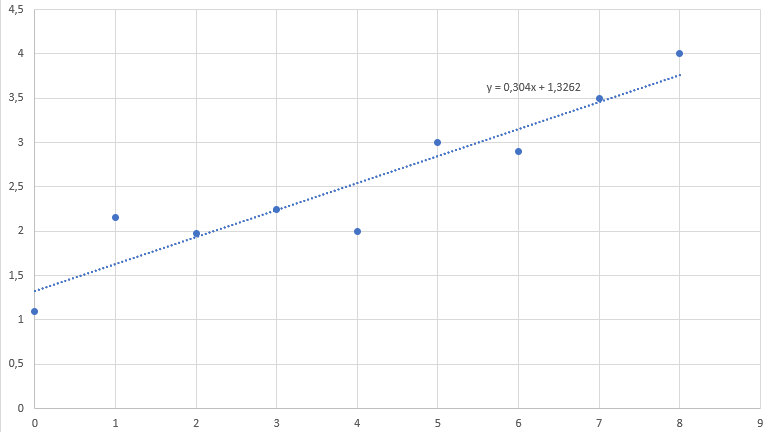



Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

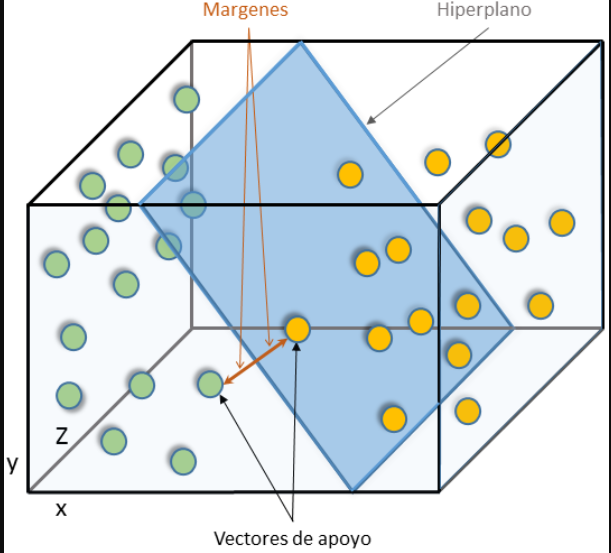

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.

## **Definição do Problema**

Desenvolver um sistema de machine learning capaz de predizer o valor de um imóvel na California. Para isso, vamos usar o dataset de informações do U.S. Census Sevice sobre habitação no estado da Californai, disponível no site Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices) .

Esse dataset contém informações derivadas o censo de 1990 sobre localização, número de quartos, média salárial, valor das casas, entre outras informações, estando concentradas em distritos da California.

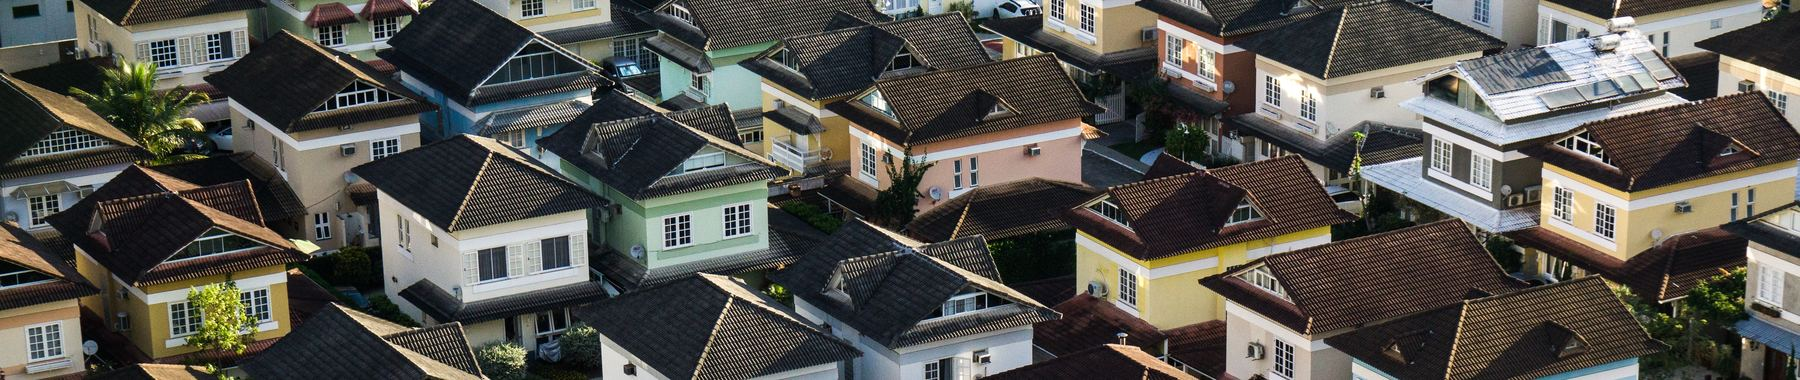

## **Roteiro**

### **1** - Carregando o Dataset

A biblioteca sklearn é uma biblioteca de aprendizado de máquina em Python amplamente utilizada para tarefas de análise de dados e modelagem estatística. Seu nome completo é scikit-learn e ela oferece uma ampla gama de algoritmos e ferramentas para tarefas de aprendizado de máquina, como classificação, regressão, agrupamento, redução de dimensionalidade, seleção de recursos e pré-processamento de dados.

O sklearn possui algums datasets já pré carragados, de modo que neste primeiro passo, vamos carregar o dataset Iris do sklearn.

In [4]:
# Inicializção das bibliotecas
%matplotlib inline

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset Iris
from sklearn.datasets import fetch_california_housing

# Carregar o dataset em um objeto
california = fetch_california_housing()

### **2** - Explorando o Dataset

A função fetch_california_housing() é chamada para carregar o conjunto de dados na variável california. Em seguida, você pode acessar os dados deste dataset chamando o método keys(). Note que o retorno desse metodo são 'data', 'target', 'frame', 'target_names', 'feature_names' e 'DESCR'.
Este último vai descrever as caracteristicas do dataset como um todo. Explore os outros e verifique o que cada um significa.

In [3]:
#para conhecer o que foi importado do dataset
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(california.frame)

None


In [10]:
print(california.target_names)

['MedHouseVal']


In [11]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### **2.1** - Mais detalhes

Podemos ainda obter mais informações sobre o dataset, apenas mandando "printar" o próprio objeto.

In [12]:
# Acessando os dados e os rótulos
data = california.data      # Dados de entrada (características)
target = california.target  # Rótulos de classe
data_names= california.feature_names
target_names = california.target_names # Identificação dos rótulos de classes

# Imprimindo informações sobre o conjunto de dados
print("Shape dos dados:", data.shape)

Shape dos dados: (20640, 8)


In [13]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### **3** - Analise dos dados

Agora precisamos analisar os dados e tentar entender como eles se relacionam.

Essa etapa faz parte da Analise Exploratória que vimos nas últimas aulas, em que precisamos levantar hipóteses sobre como as caracteristcas das casas e suas localizações influenciam no preço de venda. Para isso, utilizamos o **seaborn** para criar gráficos e analisar visualmente os dados.

OBS: Lembre-se que temos muitos atributos numéricos possíveis, com um resultado do tipo numérico (valor da casa). Verifique a documentação do seaborn em (https://seaborn.pydata.org/examples/index.html) para determinar qual gráfico é mais adequado para validar a sua hipótese.

In [22]:
# Para podermos usar esse dataset como fonte de um gráfico, precisamos criar um Data Frame com Pandas
cf_df = pd.DataFrame(data, columns = data_names)

# Vamos printar o DataFrame e ver como ficou
cf_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
# Vamoas analisar as informações desse dataset
cf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [24]:
# Vamos pegar aglumas métricas tambem
cf_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### **3.1** - Mas e os preços das casas?
Note que o dataset carregado pelo pandas não tem a coluna target, que é justamente o preço das casas, e a informação que queremos que nosso modelo predite. Precisamos inclui-la neste dataset.

In [25]:
#Sua resposta aqui
cf_df['Price'] = target
cf_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
cf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [29]:
cf_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **3.2** - Agora vamos criar alguns gráficos para tentar enteder a correlação entre eles
Para isso, vamos usar uma matriz de correlação e tentar responder:

 - Qual feature possui a maior correlação **positiva** com o target?

 - Qual feature possui a maior correlação **negativa** com o target?

<Axes: >

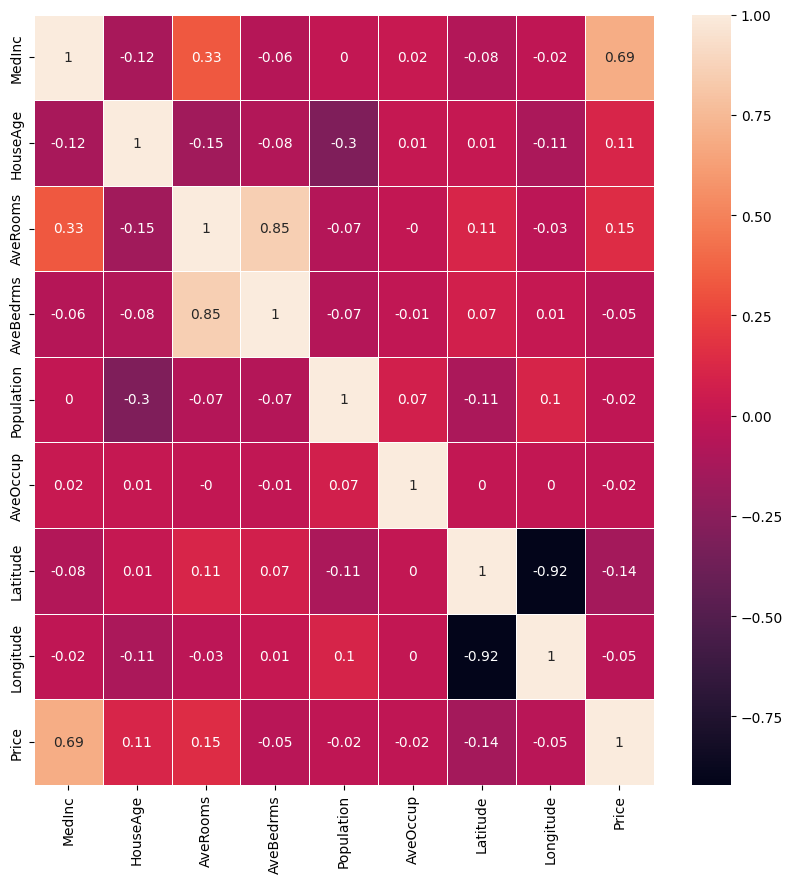

In [30]:
#Sua resposta

import seaborn as sns
correlation_matrix = cf_df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

<Axes: xlabel='MedInc', ylabel='Price'>

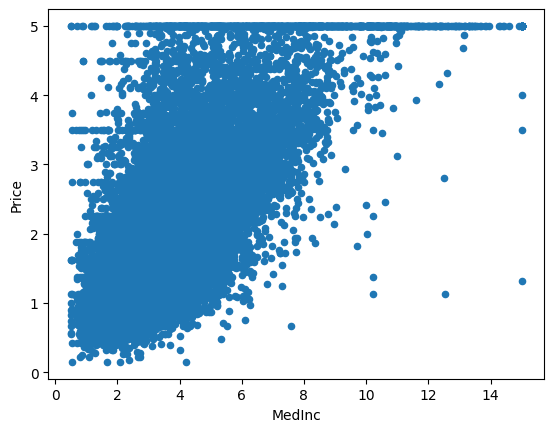

In [31]:
cf_df.plot.scatter('MedInc', 'Price')

### **4** - Se preparando para implementar o modelo

Agora que você identificou uma correlação vamos nos preparar para implementar o modelo. Primeiro temos que criar um novo dataset, somente com os dados que vamos utilizar, aqueles que identificamos a correlação.

Obs: Lembre-se que estamos começando o projeto do nosso modelo, então precisamos criar duas "tabelas", uma com os atributos (entradas) e outra com o preço da casa (target).

In [32]:
#Sua resposta aqui

# Vamos treinar nosso modelo com 2 dois atributos independentes

# para predizer o valor de saida
#entradas = cf_df[['MedInc', 'HouseAge','AveRooms']]   ### teste com as entradas de correlação mais positivas
#entradas = cf_df[['MedInc']]                          ### teste com uma entrada de maior correlação
entradas = cf_df.drop(['Price'], axis=1)              ### teste com todas as entradas

precos = cf_df['Price']
print(f"Formato das tabelas de dados {entradas.shape} e saidas {precos.shape}")

Formato das tabelas de dados (20640, 8) e saidas (20640,)


Com os dois suconjuntos criados precisamos separa-los em dataset de Treino e dataset de Teste.

Se você não se lembra o que isso quer dizer, leia o roteiro da última aula, mas aqui vai uma breve revisão: Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória sempre que rodarmos a função.

Para eliminarmos essa aleatoriedade, vamos fixar a semente do algoritmo de geração de números randomicos da biblioteca, usando **random_state = 42**

In [33]:
from sklearn.model_selection import train_test_split

# Separamos 20% para o teste
entradas_treino, entradas_teste, preco_treino, preco_teste = train_test_split(entradas, precos, test_size = 0.2, random_state = 42)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")
print()

#Primeiras linhas do dataframe
print(entradas_treino.head())

print()

print(preco_treino.head())

Formato das tabelas de dados de treino (16512, 8) e teste (4128, 8)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: Price, dtype: float64


### **5 - Criando e Treinando o Modelo**

Agora vamos treinar o nosso modelo baseado no Algoritmo de Regressão Linear!

Treinar um modelo no python é simples se usar o Scikit-Learn e treinar um modelo é mais simples ainda: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do scikit-learn:

* O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros;
* O método predict(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes;
* Não esqueça de importar as bibliotécas com "from sklearn.linear_model import LinearRegression";

In [35]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(entradas_treino, preco_treino)


LinearRegression()

Agora que temos o modelo treinado, vamos testar!

Para testar o modelo, vamos usar o método predict() com os dados de teste que separamos. Verifique se as resposta fazem sentido e determine a eficácia do modelo, ou seja, o quão bom ele foi em prever os valores das casas

In [39]:
#Sua resposta aqui
# Para obter as previsões, basta chamar o método predict()
preco_predito = lin_model.predict(entradas_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(preco_predito))

Predição usando regressão, retorna valores continuos: [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


Vamos avaliar o modelo treinado colocando algumas valores e ver como ele se comporta baseado nas métricas

In [40]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f "     % np.sum((preco_predito - preco_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f"           % mean_squared_error(preco_teste, preco_predito))
print("Erro Médio Absoluto (MAE): %.2f"             % mean_absolute_error(preco_teste, preco_predito))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(preco_teste, preco_predito)))

print("R2-score: %.2f" % r2_score(preco_predito , preco_teste) )

Soma dos Erros ao Quadrado (SSE): 2295 
Erro Quadrático Médio (MSE): 0.56
Erro Médio Absoluto (MAE): 0.53
Raiz do Erro Quadrático Médio (RMSE): 0.75 
R2-score: 0.34


### **6** - Analisando o modelo

Lembre-se que a regressão linear aproxima os dados para uma reta, por isso esse modelo pode nos retornar o coeficiente angular e o coeficiente linear usado nas prediçoes!

In [41]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -37.02327770606409
(B) Inclinação:  [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Nossa equação é: Y_pred = -37.02 + 0.45 * X_LSTAT + 0.01 * X_RM


Text(0, 0.5, 'Valor Predito')

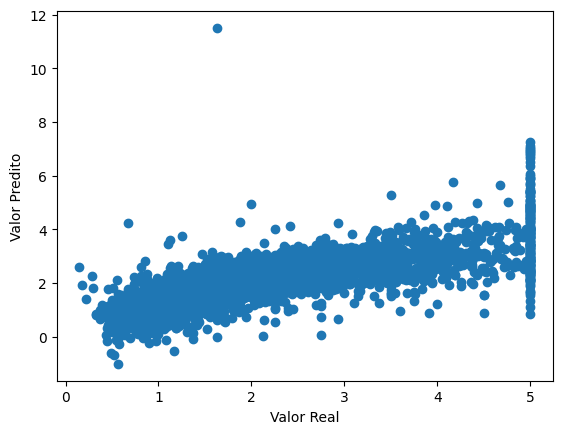

In [42]:
plt.scatter(preco_teste,preco_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

### **7 -** Exportando o Modelo

Por fim, vamos exportar o nosso modelo para ultizar em nossas aplicações. Para fazer isso, usaremos o Pickle, com o método dump()

In [46]:
import pickle

with open('CaliforniaHousing.pkl', 'wb') as file:
  pickle.dump(lin_model,file)

### **8 -** Importando o Modelo

Agora que temos um arquivo pkl, que é o nosso modelo treinado no formato black box, podemos carrega-lo em nossas aplicações. Por exemplo:

Podemos criar um aplicativo de venda de imóveis em que o proprietário entra com os dados e o programa calcula qual seria o valor ideal da propriedade.

In [62]:
# Carregando o modelo salvo
with open('/content/CaliforniaHousing.pkl', 'rb') as arquivo:
    modelo = pickle.load(arquivo)

# Lista com as características de teste
dados_de_teste = [[3.2596, 33.0, 5.017657, 1.006421, 2300.0, 3.691814, 32.71, -117.03]]
columns = ["MedInc",	"HouseAge",	"AveRooms",	"AveBedrms",	"Population",	"AveOccup",	"Latitude",	"Longitude"]

# Criando o DataFrame com duas colunas
df = pd.DataFrame(dados_de_teste, columns)

# Utilizando o modelo carregado
resultado = modelo.predict(df)
preco = resultado[0] * 100

print("Valor predido do imóvel: %.2f mil dolares" %preco)

Valor predido do imóvel: 193.73 mil dolares


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exercicio

Implemente um modelo capaz de predizer os valores das casas da California usando uma técnica de Regressão Polinomial. Comente como os resultados diferem entre as técnicas.

Soma dos Erros ao Quadrado (SSE): 16519 
Erro Quadrático Médio (MSE): 550.63
Erro Médio Absoluto (MAE): 18.81
Raiz do Erro Quadrático Médio (RMSE): 23.47 
R2-score: 0.99


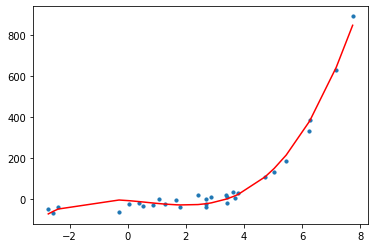

In [ ]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 3
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()